In [140]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [203]:
x = np.linspace(-5,5,1000)
y = np.exp(-x*x)

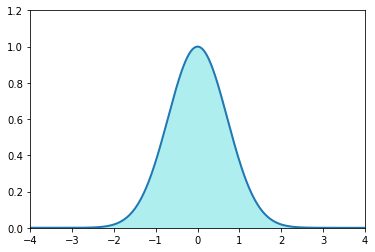

In [208]:
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.fill_between(x,y,0, where = ((x>-4)&(x <4)), color = '#AFEEEE')
ax.set(xlim=(-4, 4), xticks=np.arange(-4, 5),
       ylim=(0, 1.2), yticks=[0,0.2,0.4,0.6,0.8,1,1.2])

plt.show()

Допустим, мы хотим посчитать интеграл $\int\limits_{-4}^4e^{-x^2}dx$. Воспользуемся методом Монте-Карло представим искомый интеграл в виде: 
$$
(4-(-4))\int\limits_{-4}^4 e^{-x^2} \frac{1}{4-(-4)}dx\\
8\int\limits_{-4}^4 e^{-x^2} \frac{1}{8}dx
$$

А это формула матожидания функции $e^{-X^2}$ от равномерно распределенной на отрезке $[-4,4]$ случайной величины $X$.

Приблизительно вычислим интеграл, сгенерировав некторое количество случайных чисел (равномерно распределенных) от -4 до 4. Согласно Закону Больших Чисел
$$
\forall\ \epsilon>0:\ \Pr(|\frac{1}{n}(X_1+\ldots+X_n)-\frac{1}{n}(E[X_1]+\ldots+E[X_n])|\geqslant \epsilon)\underset{n\rightarrow \infty}{\longrightarrow} 0
$$

У нас $X_i$ - одинаково распределенные на $[-4,4]$ независимые величины, поэтому 
$$
\bar X\underset{n\rightarrow \infty}\longrightarrow E [X_i]
$$

Отсюда
$$
\frac{1}{n}\sum_{i=1}^n e^{-X_i^2}\longrightarrow E[e^{-X_i^2}]
$$
Главное, не забыть умножить полученный результат на 8, т.к. $I\approx8E[e^{-X_i^2}]$
С помощью генератора случайный чисел, нагенерируем наблюдений.

Для начала возьмем $n=10$

In [129]:
n = 10
data = np.array([random.uniform(-4,4) for i in range(n)])
func = np.exp(-data**2)
Integral = 8*sum(func)/n
Integral

3.303096980823477

Теперь возьмем $n=50$

In [130]:
n = 50
data = np.array([random.uniform(-4,4) for i in range(n)])
func = np.exp(-data**2)
Integral = 8*sum(func)/n
Integral

2.206264676667942

$n=100$

In [131]:
n = 100
data = np.array([random.uniform(-4,4) for i in range(n)])
func = np.exp(-data**2)
Integral = 8*sum(func)/n
Integral

1.5070209178831593

$n = 1000$

In [132]:
n = 1000
data = np.array([random.uniform(-4,4) for i in range(n)])
func = np.exp(-data**2)
Integral = 8*sum(func)/n
Integral

1.7407429245049386

$n=10000$

In [133]:
n = 10000
data = np.array([random.uniform(-4,4) for i in range(n)])
func = np.exp(-data**2)
Integral = 8*sum(func)/n
Integral

1.7575870406745084

$n=100000$

In [134]:
n = 100000
data = np.array([random.uniform(-4,4) for i in range(n)])
func = np.exp(-data**2)
Integral = 8*sum(func)/n
Integral

1.7705937033388892

$n = 1000000$

In [135]:
n = 1000000
data = np.array([random.uniform(-4,4) for i in range(n)])
func = np.exp(-data**2)
Integral = 8*sum(func)/n
Integral

1.772394933084138

In [147]:
n = 1000000000
s = 0
for i in range(n):
    num = random.uniform(-4,4)
    s+= np.exp(-pow(num,2))
Integral = 8*s/n

In [148]:
Integral

1.7725242181245766

Теперь попробуем решить более прикладную задачу: посчитаем вероятность того, что случайная величина, имеющая стандартное нормальное распределение примет значение от -2 до 2, т.е. необходимо приблизить значение следующего интеграла:
$$
\int\limits_{-2}^{2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}dx=\\=
4\int\limits_{-2}^2\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}\frac{1}{4}dx
$$

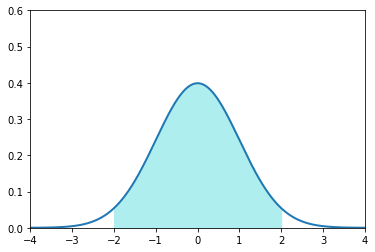

In [199]:
x = np.linspace(-5,5,1000)
y = np.exp(-pow(x,2)/2)/np.sqrt(2*np.pi)

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.fill_between(x,y,0, where = ((x>-2)&(x < 2)), color = '#AFEEEE')

ax.set(xlim=(-3, 3), xticks=np.arange(-4, 5),
       ylim=(0, 0.6), yticks=[0,0.1,0.2,0.3,0.4,0.5,0.6])


plt.show()

In [150]:
n = 100
sum_func = 0
for i in range(n):
    num = random.uniform(-2,2)
    sum_func += np.exp(-pow(num,2)/2)/np.sqrt(2*np.pi)
Integral = 4*sum_func/n
Integral

0.922248075326478

In [151]:
n = 10000
sum_func = 0
for i in range(n):
    num = random.uniform(-2,2)
    sum_func += np.exp(-pow(num,2)/2)/np.sqrt(2*np.pi)
Integral = 4*sum_func/n
Integral

0.9490104012905939

In [154]:
n = 100000000
sum_func = 0
for i in range(n):
    num = random.uniform(-2,2)
    sum_func += np.exp(-pow(num,2)/2)/np.sqrt(2*np.pi)
Integral = 4*sum_func/n
Integral

0.9545308249113165

Допустим, мы хотим посчитать вероятность того, что случайная величина, имеющее нормальное распределение с мат. ожиданием 3 и дисперсией 4 примет значения меньше либо равные 1, т.е. посчитать
$$
\int\limits_{-\infty}^{1}\frac{1}{2\sqrt{2\pi}}e^{\frac{-(x-3)^2}{8}}dx
$$
Согласно правилу трех сигм примерно $99.7$ процентов возможных значений лежат в пределах трех стандартных отклонений от среднего, т.е., в данном случае, внутри отрезка $[3-3\cdot2,3+3\cdot2] = [-3,9]$. Поэтому интеграл будем с нижним пределом не $-\infty,$ а $-9,$ что еще на три стандартных отклонения меньше в отрицательную сторону по оси абсцисс.
$$
10\int\limits_{-9}^{1}\frac{1}{2\sqrt{2\pi}}e^{\frac{-(x-3)^2}{8}}\frac{1}{10}dx
$$


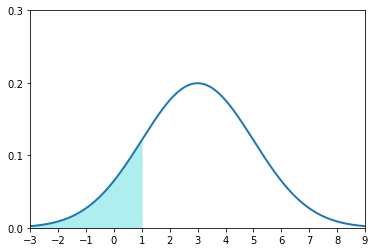

In [221]:
x = np.linspace(-10,10,1000)
y = np.exp(-pow(x-3,2)/8)/np.sqrt(8*np.pi)

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.fill_between(x,y,0, where = (x < 1), color = '#AFEEEE')

ax.set(xlim=(-3, 9), xticks=np.arange(-3, 10),
       ylim=(0, 0.3), yticks=[0,0.1,0.2,0.3])


plt.show()

Сразу найдем точное приближение: возьмем $n = 10^7$

In [224]:
n = 10000000
sum_func = 0
for i in range(n):
    num = random.uniform(-9,1)
    sum_func += np.exp(-pow(num - 3,2)/8)/(2*np.sqrt(2*np.pi))
Integral = 10 * sum_func/n
Integral

0.15867016873312687

Если стандартизировать данную случайную величину (обозначим ее за $X$), то 
$$
X\sim\mathcal{N}(3,4)\Rightarrow\\
\frac{X-3}{2} = N\sim\mathcal{N}(0,1)
$$
т.е. необходимо посчитать следующую вероятность:
$$
\Pr(N\leqslant -1)
$$
Согласно табличке нормального распределения данная вероятность примерно равна $1-0.8413 = 0.1587.$ Так что полученный выше результат является довольно точным.